# 3-5번 문제 

(나) 0도씨의 물 1kg을 50도씨의 열원과 열적으로 접촉시켜서 물의 온도를 50도씨로 올렸다. 그 다음, 100도씨의 열원과 접촉시켜서 물의 온도를 100도씨로 올렸다. 물 열원 및 전체 계의 엔트로피 변화량을 구해라.

물의 비열: $4190J/kg\cdot K$, 물의 엔트로피 변화량: $\int dS=C\,\mbox{ln}\frac{T_f}{T_i},\quad $Heat reservoir의 $\Delta S=\frac{\Delta Q}{T}$

In [57]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [31]:
C=4190   #1kg물의 열용량
B_P=373  # 끓는점
step=2  # 0~50, 50~100도씨의 두 단계

def ent_change_water(Ti,Tf):
    dS=C*log(Tf/Ti)
    return dS

def ent_change_HR(TR,Ti,Tf):
    ds=-C*(Tf-Ti)/TR
    return ds

Tem=np.linspace(0,100,step+1)+273  # 온도 set (절대온도)

In [32]:
Tem

array([273., 323., 373.])

이제 행렬을 짜서 1행에는 물의 엔트로피 변화량들을 저장하고 2행에는 Heat reservoir의 엔트로피 변화량들을 저장할 것이다. 

In [37]:
nmat=np.zeros((2,step),dtype=float) # step만큼 열 개수를 만든 더미 세트 

In [38]:
nmat

array([[0., 0.],
       [0., 0.]])

이제 값들을 넣기만 하면 된다. 

In [41]:
for i in range(step):
    nmat[0,i]=ent_change_water(Tem[i],Tem[i+1])
    nmat[1,i]=ent_change_HR(Tem[i+1],Tem[i],Tem[i+1])  #각 단계마다 Heat reservoir는 Tf의 값과 같다!
nmat

array([[ 704.67641248,  603.050344  ],
       [-648.60681115, -561.66219839]])

In [43]:
from pandas import DataFrame

In [46]:
frame1=DataFrame(nmat,columns=['A1','A2'],index=['water','HR'])
frame1

,A1,A2
water,704.676412,603.050344
HR,-648.606811,-561.662198


In [47]:
#총 엔트로피 변화량

sum_S=0

for i in range(2):    #2행짜리니까 
        sum_S+=np.sum(nmat[i])

In [48]:
sum_S

97.45774694567399

이제 step이 10개 있을 때 어떻게 되나 보자.

In [49]:
C=4190   #1kg물의 열용량
B_P=373  # 끓는점
step=10  # 0~50, 50~100도씨의 두 단계

def ent_change_water(Ti,Tf):
    dS=C*log(Tf/Ti)
    return dS

def ent_change_HR(TR,Ti,Tf):
    ds=-C*(Tf-Ti)/TR
    return ds

Tem=np.linspace(0,100,step+1)+273  # 온도 set (절대온도)

nmat=np.zeros((2,step),dtype=float) # step만큼 열 개수를 만든 더미 세트 

for i in range(step):
    nmat[0,i]=ent_change_water(Tem[i],Tem[i+1])
    nmat[1,i]=ent_change_HR(Tem[i+1],Tem[i],Tem[i+1])  #각 단계마다 Heat reservoir는 Tf의 값과 같다!
nmat

array([[ 150.7356793 ,  145.50073066,  140.6172233 ,  136.05091328,
         131.77186594,  127.75379872,  123.97354061,  120.41058493,
         117.04671702,  113.86570274],
       [-148.0565371 , -143.00341297, -138.28382838, -133.8658147 ,
        -129.72136223, -125.82582583, -122.1574344 , -118.69688385,
        -115.42699725, -112.33243968]])

In [52]:
#총 엔트로피 변화량

sum_S=0

for i in range(2):
        sum_S+=np.sum(nmat[i])
        
sum_S

20.356220098111407

전체 계의 엔트로피 변화량이 훨씬 줄었다!

In [54]:
def sum_S(step):
    Temp=np.linspace(0,100,step+1)+273  # 온도 set (절대온도)

    Nmat=np.zeros((2,step),dtype=float) # step만큼 열 개수를 만든 더미 세트 

    for i in range(step):
        Nmat[0,i]=ent_change_water(Temp[i],Temp[i+1])
        Nmat[1,i]=ent_change_HR(Temp[i+1],Temp[i],Temp[i+1])  #각 단계마다 Heat reservoir는 Tf의 값과 같다!
    sum_S=0
    for j in range(2):
        sum_S+=np.sum(Nmat[j])
    
    return sum_S

함수를 정의했으니 그림을 그려보자-step수 증가에 따른 총 엔트로피 증가량의 감소 ??

In [68]:
px=[1,2,4,5,10,20,25,50,100]  #100의 약수들
py=[]

for xx in px:
    py.append(sum_S(xx))


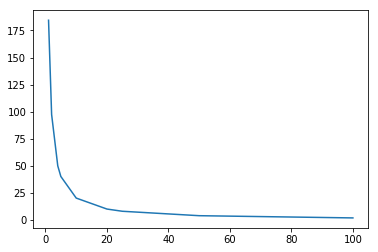

In [72]:
plt.plot(px,py)
plt.show()

In [73]:
py

[184.40235969976402,
 97.45774694567399,
 50.07643747360885,
 40.27800243746378,
 20.356220098111407,
 10.232473353410569,
 8.194678852997185,
 4.106040188213456,
 2.0551953786418835]

전체 계의 엔트로피 변화량이 계속 줄지만 0이 되지는 않는다!

In [78]:
sum_S(100000) #도 0이 아니다. 이유: dQ=TdS이기 때문에 heat이 왔다갔다 하면 dS가 생길 수밖에 없음!

0.002057368579244212